In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

In [2]:
result_comparison = pd.read_csv('./metrics_comparison.csv', index_col=0)

result_comparison_mean = pd.DataFrame(result_comparison.groupby(
    ['Model', 'Metrics'])['Value'].mean()).reset_index()
result_comparison_mean

,Model,Metrics,Value
0,Boosting classiﬁer (AdaBoost),accuracy,0.89775
1,Boosting classiﬁer (AdaBoost),f1,0.89750
2,Boosting classiﬁer (AdaBoost),precision,0.99600
3,Boosting classiﬁer (AdaBoost),recall,0.80725
4,K-nearest neighbors (KNN),accuracy,0.77450
5,K-nearest neighbors (KNN),f1,0.77350
6,K-nearest neighbors (KNN),precision,0.99650
7,K-nearest neighbors (KNN),recall,0.65250
8,Linear SVM (LSVM),accuracy,0.89825
9,Linear SVM (LSVM),f1,0.89800


In [3]:
result_comparison

,Model,DataSet,Metrics,Value
0,K-nearest neighbors (KNN),DS1,accuracy,0.795
1,K-nearest neighbors (KNN),DS2,accuracy,0.764
2,K-nearest neighbors (KNN),DS3,accuracy,0.768
3,K-nearest neighbors (KNN),DS4,accuracy,0.771
4,K-nearest neighbors (KNN),DS1,precision,0.993
...,...,...,...,...
107,Boosting classiﬁer (AdaBoost),DS4,recall,0.789
108,Boosting classiﬁer (AdaBoost),DS1,f1,0.913
109,Boosting classiﬁer (AdaBoost),DS2,f1,0.891
110,Boosting classiﬁer (AdaBoost),DS3,f1,0.898


Text(0, 0.5, 'Value')

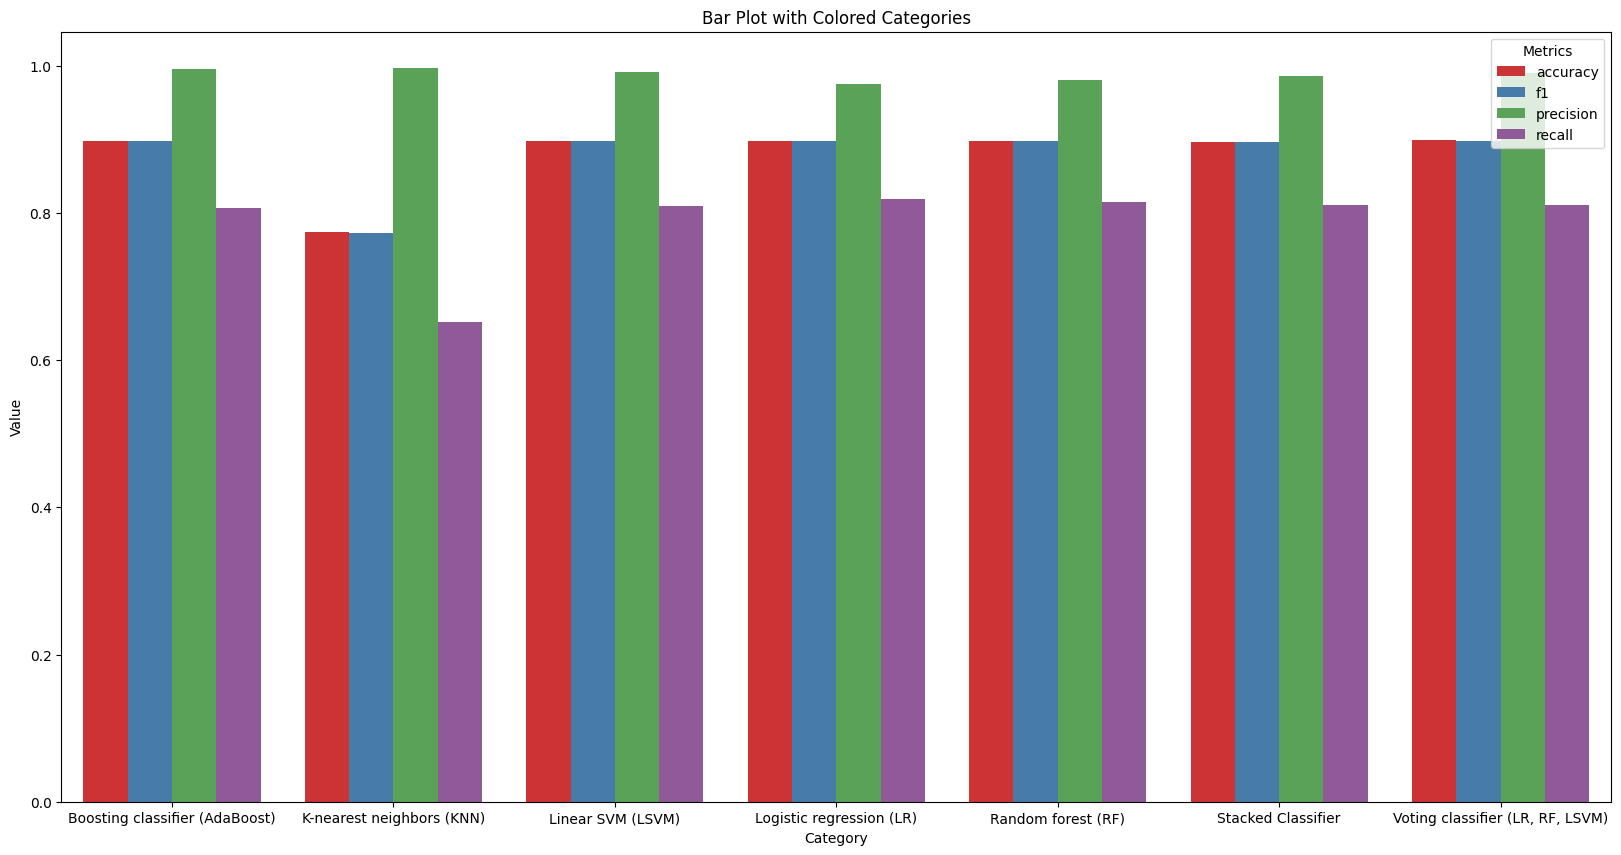

In [11]:
import seaborn as sns

plt.figure(figsize=(20, 10))
# Create a bar plot with colored categories
sns.barplot(x='Model', y='Value', 
            data=result_comparison_mean, hue='Metrics',
            palette=sns.color_palette("Set1"))
# Set plot title and labels
plt.title('Bar Plot with Colored Categories')
plt.xlabel('Category')
plt.ylabel('Value')

In [58]:
metrics_names = ['accuracy', 'precision', 'recall', 'f1']
result_comparison_directory = dict()

In [62]:

for metrics in metrics_names:
    result_comparison_entry = result_comparison[result_comparison['Metrics'] == metrics].drop(columns = 'Metrics') 
    result_comparison_entry = result_comparison_entry.pivot(index='Model', columns='DataSet', values='Value')
    result_comparison_entry.reset_index(inplace=True)
    result_comparison_entry.columns.name = None
    result_comparison_entry.name = metrics
    result_comparison_directory[metrics] = result_comparison_entry

In [63]:
for metrics in metrics_names:
    display(result_comparison_directory[metrics])

,Model,DS1,DS2,DS3,DS4
0,Boosting classiﬁer (AdaBoost),0.914,0.891,0.898,0.888
1,K-nearest neighbors (KNN),0.795,0.763,0.768,0.770
2,Linear SVM (LSVM),0.913,0.893,0.897,0.889
3,Logistic regression (LR),0.909,0.895,0.898,0.891
4,Random forest (RF),0.916,0.888,0.899,0.888
5,Stacked Classifier,0.913,0.889,0.895,0.891
6,"Voting classiﬁer (LR, RF, LSVM)",0.914,0.894,0.899,0.888


,Model,DS1,DS2,DS3,DS4
0,Boosting classiﬁer (AdaBoost),0.993,0.993,0.998,1.000
1,K-nearest neighbors (KNN),0.993,0.998,0.995,1.000
2,Linear SVM (LSVM),0.988,0.990,0.993,0.995
3,Logistic regression (LR),0.966,0.979,0.977,0.979
4,Random forest (RF),0.988,0.971,0.984,0.981
5,Stacked Classifier,0.983,0.981,0.988,0.990
6,"Voting classiﬁer (LR, RF, LSVM)",0.988,0.988,0.993,0.993


,Model,DS1,DS2,DS3,DS4
0,Boosting classiﬁer (AdaBoost),0.832,0.798,0.810,0.789
1,K-nearest neighbors (KNN),0.671,0.640,0.651,0.646
2,Linear SVM (LSVM),0.833,0.802,0.811,0.793
3,Logistic regression (LR),0.839,0.811,0.821,0.804
4,Random forest (RF),0.838,0.804,0.819,0.798
5,Stacked Classifier,0.836,0.800,0.810,0.798
6,"Voting classiﬁer (LR, RF, LSVM)",0.835,0.805,0.814,0.792


,Model,DS1,DS2,DS3,DS4
0,Boosting classiﬁer (AdaBoost),0.913,0.891,0.898,0.888
1,K-nearest neighbors (KNN),0.795,0.762,0.766,0.769
2,Linear SVM (LSVM),0.912,0.893,0.897,0.889
3,Logistic regression (LR),0.908,0.894,0.898,0.890
4,Random forest (RF),0.915,0.887,0.899,0.888
5,Stacked Classifier,0.912,0.889,0.895,0.891
6,"Voting classiﬁer (LR, RF, LSVM)",0.913,0.894,0.899,0.888
